In [43]:
# this code will hide the coding cells..
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
# import 
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import HTML
df = pd.read_csv('jre2_clean.csv')

In [3]:
# a few cleaning bits..
# get rid of the episode number from the title
df['ep_title'] = df.ep_title.str.replace('\\#\d{1,4}- ', '')
# drop 'best of' episodes, episodes less than 55 min, and fight companion episodes..
mask1 = ~df.ep_title.str.contains('Best of')
mask2 = df.runtime > 55
mask3 = ~df.ep_title.str.contains('Fight Companion')
df = df[mask1&mask2&mask3]

# change the date format using pd.to_datetime(), and then set the airdate as index.
df['airdate'] = pd.to_datetime(df.airdate)
df = df.set_index('airdate')

# create two separate data frames: 1 with no tag column, and one with tag column.  Then drop the duplicates from the dataframe
dft = df.copy()
df = df.drop('tag', axis = 1)
df = df.drop_duplicates()

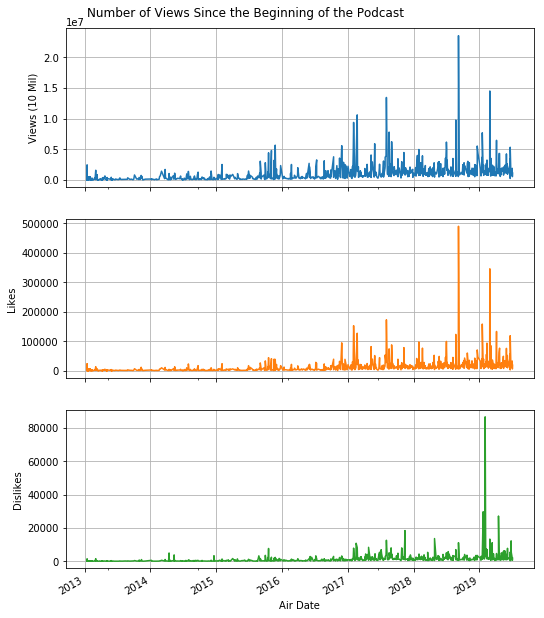

In [61]:
# plot time series of views
# need to format the plot.  label y axis, and get more tick marks, maybe...
cols = ['views', 'likes', 'dislikes']
ylabels = ['Views (10 Mil)', 'Likes', 'Dislikes']
axes = df[cols].plot(title = 'Number of Views Since the Beginning of the Podcast', figsize=(10,10), subplots = True, legend = False, grid = True)
# There are a few spikes that are interesting.  Who are these people receving so many views?
plt.subplots_adjust(top=.95, left=.25)
#plt.ylabel(['Dislikes', 'Likes', 'Views (10 Mil)'])
i = 0
for ax in axes:
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('Air Date')
    i += 1

In [89]:
# these will return df for ranges in which spikes occur:
t1 = df['2015-06':'2016-01']
t2 = df['2017-01':'2017-03']
t3 = df['2017-06':'2017-09']
t4 = df['2018-06':'2019-01']
t5 = df['2019-01':]

# number in top n
n = 10

# Views
tv1 = t1.nlargest(n, 'views')
tv2 = t2.nlargest(n, 'views')
tv3 = t3.nlargest(n, 'views')
tv4 = t4.nlargest(n, 'views')
tv5 = t5.nlargest(n, 'views')

# Likes
t1.nlargest(n, 'likes')
t2.nlargest(n, 'likes')
t3.nlargest(n, 'likes')
t4.nlargest(n, 'likes')
t5.nlargest(n, 'likes')

# dislikes
t1.nlargest(n, 'dislikes')
t2.nlargest(n, 'dislikes')
t3.nlargest(n, 'dislikes')
t4.nlargest(n, 'dislikes')
t5.nlargest(n, 'dislikes')



# create a new data frame with a column called 'spike', to label the spikes in 


tv1['spike'] = ['1']*10
tv2['spike'] = ['2']*10
tv3['spike'] = ['3']*10
tv4['spike'] = ['4']*10
tv5['spike'] = ['5']*10
tv = pd.concat([tv1,tv2,tv3,tv4,tv5], axis = 0)


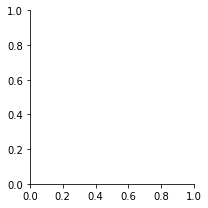

In [102]:
tvs.

In [45]:
# plot bar plots for 
t5.nlargest(10, 'dislikes')

,ep,ep_title,runtime,views,likes,dislikes,ratio
airdate,,,,,,,
2019-02-02,1236.0,Jack Dorsey,115.13,1575178,13684,86622,0.16
2019-01-22,1228.0,Bari Weiss,172.32,1149860,12983,29676,0.44
2019-04-17,1282.0,Adam Conover,167.22,1564034,19395,27119,0.72
2019-02-28,1255.0,Alex Jones Returns!,280.47,14498419,346023,13288,26.04
2019-06-26,1316.0,Abby Martin,136.68,1551028,21480,12221,1.76
2019-03-13,1263.0,Renée DiResta,127.92,964511,9735,11104,0.88
2019-03-07,1259.0,David Wallace-Wells,113.58,1158346,14082,9616,1.46
2019-06-06,1311.0,David Pakman,125.38,1653621,27253,7753,3.52
2019-03-06,1258.0,"Jack Dorsey, Vijaya Gadde & Tim Pool",205.18,3543086,84608,7596,11.14


Text(0.5, 1.0, 'Top 10 Guests by Number of Views: Spike 1')

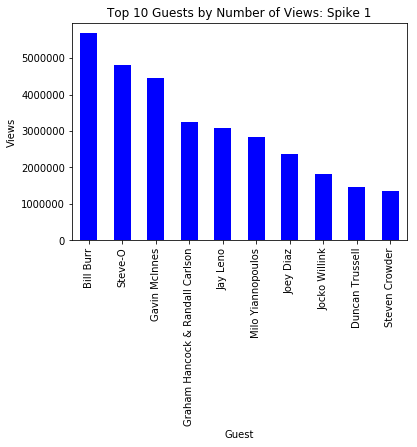

In [65]:
# First spike
axes = t1.nlargest(n, 'views').groupby('ep_title').views.mean().sort_values(ascending=False).plot.bar(color='b')
axes.set_ylabel('Views')
axes.set_xlabel('Guest')
axes.set_title('Top 10 Guests by Number of Views: Spike 1')

In [170]:
dft.groupby('tag').views.mean().sort_values(ascending=False).plot.bar()

AttributeError: Cannot access callable attribute 'sort_values' of 'SeriesGroupBy' objects, try using the 'apply' method

In [158]:
dft.sample(100)

,ep,ep_title,tag,runtime,views,likes,dislikes,ratio
airdate,,,,,,,,
2017-05-04,955.0,Al Madrigal,comedians,155.85,620634,5472,1837,2.98
2014-02-05,449.0,Justin Martindale,comedians,169.15,61436,471,48,9.81
2013-06-01,256.0,David Seaman,journalists,179.57,8499,93,4,23.25
2018-11-16,1204.0,Steven Rinella,miscellaneous,166.90,1363844,12833,1015,12.64
2018-05-22,27.0,Robin Black,athletes-fighters-martial-arts,152.67,500549,5051,496,10.18
2014-04-09,482.0,Rob MacCachren & Bud Brutsman,miscellaneous,119.28,42373,290,39,7.44
2014-04-15,485.0,Amy Schumer,writers,163.48,1070606,4439,4961,0.89
2013-03-28,181.0,Iliza Shlesinger,comedians,133.45,65669,393,43,9.14
2014-12-09,584.0,Zoltan Istvan,journalists,171.03,170707,1507,175,8.61


In [154]:
# who is in the business category?
dft[dft.tag == 'politics'].sort_values('views', ascending=False)


,ep,ep_title,tag,runtime,views,likes,dislikes,ratio
airdate,,,,,,,,
2017-08-03,993.0,Ben Shapiro,politics,159.23,13444126,172795,12582,13.73
2017-02-02,911.0,Alex Jones & Eddie Bravo,politics,223.05,9383993,152809,7855,19.45
2016-10-14,858.0,Jesse Ventura,politics,131.37,3790544,38945,2906,13.40
2017-02-16,917.0,Steven Crowder,politics,237.30,3709555,37044,10782,3.44
2018-01-31,1071.0,Steven Crowder & NotGay Jared,politics,147.88,3472520,49580,4328,11.46
2015-10-01,702.0,Milo Yiannopoulos,politics,174.28,2828309,33131,3526,9.40
2016-07-07,820.0,Milo Yiannopoulos,politics,175.32,2135954,28187,3247,8.68
2019-05-14,1295.0,Tulsi Gabbard,politics,154.80,2085641,48972,5773,8.48
2018-04-19,1107.0,Sam Harris & Maajid Nawaz,politics,118.07,2035513,28262,2429,11.64


In [ ]:
# assign a slice to dft_politics and create a new column in it called 'political lean'
dft_politics = dft[dft.tag == 'politics']
dft_politics = {'Ben Shapiro' : 'conservative', 'Alex Jones' : 'far-right', 'Jesse Ventura' : 'reform', 'Steven Crowder' : 'conservative', 'Milo Yiannopoulos' : 'libertarian', 'Tulsi Gabbard' : 'democrat', 'Sam Harris' : 'liberal', 'Dave Rubin' : 'conservative', 'Kyle Kulinsky' : 'democrat', 'Jimmy Dore' : 'democrat' : 'Douglas Murray' : 'conservative', 'Cenk Uygur' : 'progressive', 'Gary Johnson' : 'libertarian', 'Josh Zepps' : 'satirist', 'Stefan Molyneux' : 'far right', 'David Seaman' : ''}


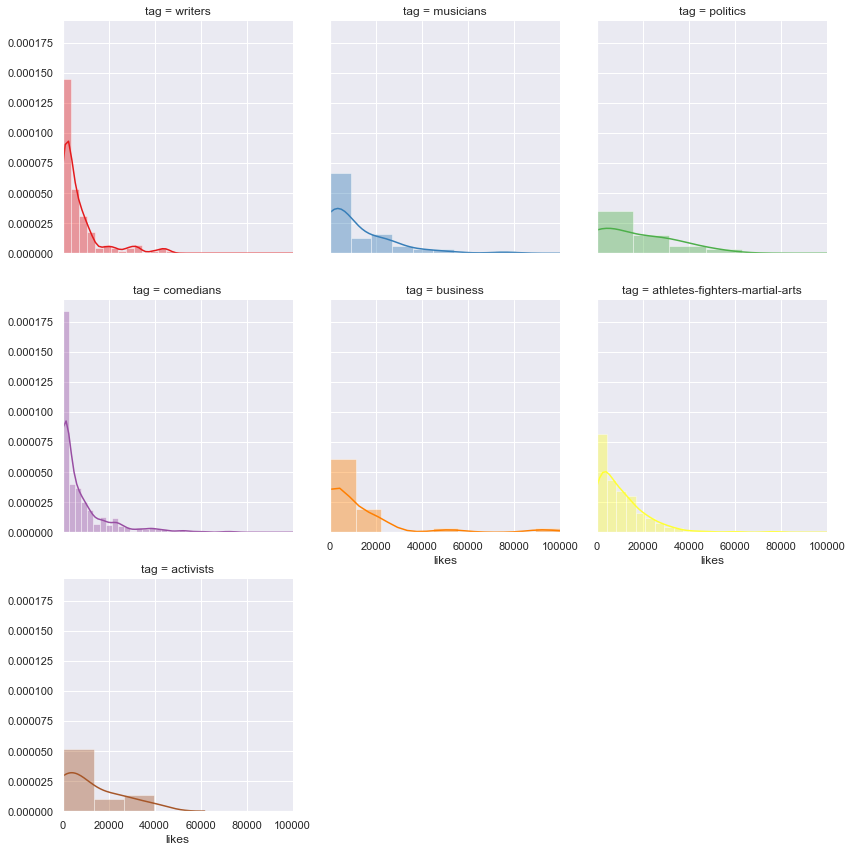

In [144]:
# plot ratio and views with same time series, and facet them..
taglist = ['politics', 'activists', 'writers', 'athletes-fighters-martial-arts', 'comedians', 'business', 'musicians']
#taglist = dft.tag.unique().tolist()
Views = sns.FacetGrid(dft[dft.tag.isin(taglist)], col='tag', col_wrap = 3, hue="tag", palette="Set1", height=4, xlim=(0,1e5))
Views.map(sns.distplot, "likes")



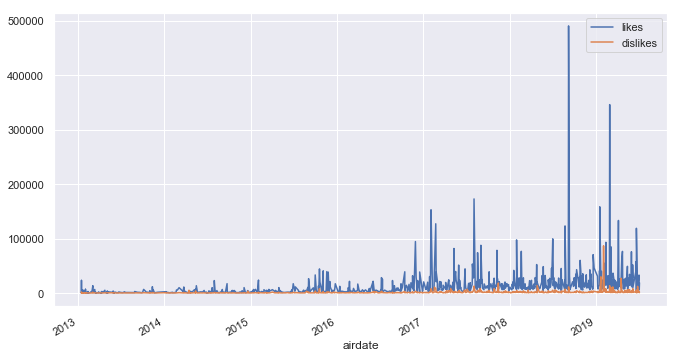

In [125]:
df['likes'].plot(legend = True)
df['dislikes'].plot(legend=True)

In [24]:
# who are the top 10 of all time?
df.nlargest(10, 'views')

,ep,ep_title,tag,runtime,views,likes,dislikes,ratio
airdate,,,,,,,,
2018-09-07,1169.0,Elon Musk,business,157.05,23500042,490622,11129,44.09
2019-02-28,1255.0,Alex Jones Returns!,miscellaneous,280.47,14498419,346023,13288,26.04
2017-08-03,993.0,Ben Shapiro,authors,159.23,13444126,172795,12582,13.73
2017-08-03,993.0,Ben Shapiro,politics,159.23,13444126,172795,12582,13.73
2017-08-03,993.0,Ben Shapiro,writers,159.23,13444126,172795,12582,13.73
2017-02-22,919.0,Neil deGrasse Tyson,authors,134.42,10607970,127137,8217,15.47
2018-08-23,1159.0,Neil deGrasse Tyson,authors,201.15,9771788,123174,6960,17.70
2017-02-02,911.0,Alex Jones & Eddie Bravo,filmmakers,223.05,9383993,152809,7855,19.45
2017-02-02,911.0,Alex Jones & Eddie Bravo,musicians,223.05,9383993,152809,7855,19.45


In [43]:
# let's see all political guests..
mask1 = ~df.ep.isna()
mask2 = df.tag=='miscellaneous'
mask3 = df.runtime > 60

df[mask1&mask2&mask3]

,ep,ep_title,tag,runtime,views,likes,dislikes,ratio
airdate,,,,,,,,
2019-06-21,1315.0,Bob Lazar & Jeremy Corbell,miscellaneous,134.75,5344755,118876,5510,21.57
2019-06-20,1314.0,Charlamagne tha God & Andrew Schulz,miscellaneous,181.80,3415078,57529,3834,15.00
2019-06-06,1311.0,David Pakman,miscellaneous,125.38,1653621,27253,7753,3.52
2013-01-23,125.0,"Giorgio A. Tsoukalos, Eddie Bravo, Brian Redban",miscellaneous,149.67,63267,464,43,10.79
2013-01-21,96.0,"Kevin Pereira, Brian Redban",miscellaneous,156.32,17797,252,7,36.00
2013-10-01,399.0,Buck Angel,miscellaneous,169.63,148685,1465,183,8.01
2013-06-22,369.0,"Jason Silva, Duncan Trussell, Ari Shaffir",miscellaneous,120.08,174545,1833,88,20.83
2013-06-03,270.0,Kevin Pereira,miscellaneous,169.93,24915,315,7,45.00
2013-05-29,232.0,Giorgio Tsoukalos,miscellaneous,141.82,458933,3709,364,10.19


In [52]:
# need to see if I can change Alex Jones Returns! to politics
df.at['2019-02-28', 'tag'] = 'politics'
df[df.ep == 1255]

,ep,ep_title,tag,runtime,views,likes,dislikes,ratio
airdate,,,,,,,,
2019-02-28,1255.0,Alex Jones Returns!,politics,280.47,14498419,346023,13288,26.04


In [56]:
df.at['2018-11-01', 'tag'] = 'comedians'